In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

print('Anaconda version: 1.6.14')
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)

Anaconda version: 1.6.14
pandas version: 0.23.0
numpy version: 1.18.1
matplotlib version: 2.2.2


In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [4]:
# open csv file
arquivo_csv = 'dados_6m.csv'

original = pd.read_csv(arquivo_csv, ';')

In [5]:
df = original.copy()

In [6]:
#linhas e colunas
df.shape

(1002, 35)

In [7]:
#TRATAMENTO DOS DADOS

In [8]:
# apenas palmeiras com altura entre 3 e 4 m
df = df[df['Altura Palmeira (m)'] == 6]

In [9]:
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

In [10]:
#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [11]:
df.shape

(136, 14)

In [12]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional,Obs
0,7/2/2020,6.0,6.0,Copa,1.0,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,"3,47",S,Secundária Inicial,NaN
1,7/2/2020,6.0,6.0,Copa,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Classificada,NaN
2,7/2/2020,6.0,6.0,Copa,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Classificada,NaN
3,7/2/2020,6.0,6.0,Copa,4.0,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,"4,43",S,Secundária Inicial,NaN
4,7/2/2020,6.0,6.0,Copa,4.0,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,3,S,Secundária Inicial,NaN


In [13]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira               float64
Altura Palmeira (m)    float64
Área                    object
Quadrante              float64
Número                 float64
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Nativa                  object
Estágio sucessional     object
Obs                     object
dtype: object


In [14]:
#Ajustando os tipos de dados

df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype(str)
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')



In [15]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                  float64
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Nativa                   object
Estágio sucessional      object
Obs                      object
dtype: object


In [16]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Nativa,Estágio sucessional,Obs
0,7/2/2020,6.0,6.0,Copa,1.0,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,3.47,S,Secundária Inicial,NaN
1,7/2/2020,6.0,6.0,Copa,2.0,NaN,nan,nan,nan,NaN,NaN,nan,Não Classificada,NaN
2,7/2/2020,6.0,6.0,Copa,3.0,NaN,nan,nan,nan,NaN,NaN,nan,Não Classificada,NaN
3,7/2/2020,6.0,6.0,Copa,4.0,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,4.43,S,Secundária Inicial,NaN
4,7/2/2020,6.0,6.0,Copa,4.0,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,3.00,S,Secundária Inicial,NaN


In [17]:
#new shape
df.shape

(136, 14)

In [18]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [19]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [20]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [21]:
#contar registros em cada grupo em estudo
df['Área'].value_counts()

Entorno    93
Copa       43
Name: Área, dtype: int64

In [22]:
#Dataframe com quadrantes sem plantas (df_with_nan)
df_with_nan= df.copy()
#df_with_nan['Número'] =  df_with_nan['Número'].fillna(0)
df_with_nan['Área'].value_counts()

Entorno    93
Copa       43
Name: Área, dtype: int64

In [23]:
#quantidade de individuos nas parcelas da copa
copa_with_nan = df_with_nan[df_with_nan['Área'] == 'Copa']
abundancia_copa = copa_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_copa

Palmeira  Quadrante
10        1.0          0
          2.0          1
          3.0          4
          4.0          1
6         1.0          1
          2.0          0
          3.0          0
          4.0          2
7         1.0          2
          2.0          2
          3.0          2
          4.0          4
8         1.0          3
          2.0          5
          3.0          2
          4.0          3
9         1.0          2
          2.0          2
          3.0          2
          4.0          2
Name: Número, dtype: int64

In [24]:
#Percentual de individuos sob as copas
total_parcelas_copa = abundancia_copa.count()
copa_0_2 = (abundancia_copa[abundancia_copa < 3 ].count() / total_parcelas_copa) * 100
copa_3_5 = (abundancia_copa[abundancia_copa[(abundancia_copa >= 3) & (abundancia_copa <6)]].count()/ total_parcelas_copa) * 100
copa_6_8 = (abundancia_copa[abundancia_copa[(abundancia_copa > 6) ]].count() / total_parcelas_copa) * 100
dados_copa = [copa_0_2,copa_3_5,copa_6_8]

In [25]:
dados_copa

[75.0, 25.0, 0.0]

Text(0.5,0,'Quantidade de regenerantes por parcela sob as copas')

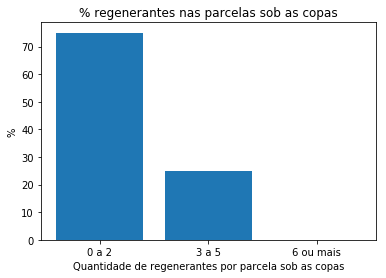

In [26]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_copa

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas sob as copas")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela sob as copas")


In [27]:
#quantidade de individuos nas parcelas no entorno
entorno_with_nan = df_with_nan[df_with_nan['Área'] == 'Entorno']
abundancia_entorno = entorno_with_nan.groupby(['Palmeira','Quadrante'])['Número'].count() 
abundancia_entorno

Palmeira  Quadrante
10        1.0          3
          2.0          4
          3.0          3
          4.0          3
6         1.0          5
          2.0          5
          3.0          4
          4.0          4
7         1.0          9
          2.0          2
          3.0          8
          4.0          6
8         1.0          3
          2.0          9
          3.0          7
          4.0          3
9         1.0          2
          2.0          6
          3.0          6
          4.0          0
Name: Número, dtype: int64

In [28]:
#Percentual de invidiviudos nas parcelas do entorno
total_parcelas_entorno = abundancia_entorno.count()
entorno_0_2 = (abundancia_entorno[abundancia_entorno < 3 ].count() / total_parcelas_entorno) * 100
entorno_3_5 = (abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 3) & (abundancia_entorno <6)]].count() / total_parcelas_entorno) * 100
entorno_6_14 =(abundancia_entorno[abundancia_entorno[(abundancia_entorno >= 6) ]].count() / total_parcelas_entorno) * 100
dados_entorno = [entorno_0_2,entorno_3_5,entorno_6_14]

In [29]:
dados_entorno

[15.0, 50.0, 35.0]

Text(0.5,0,'Quantidade de regenerantes por parcela no entorno')

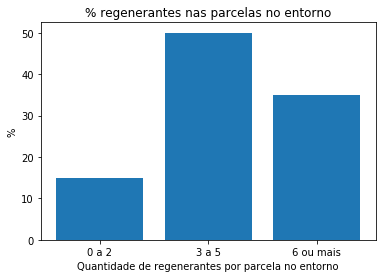

In [30]:
legendas = ['0 a 2', '3 a 5', '6 ou mais']
dados = dados_entorno

ax = plt.figure().gca()
ax.bar(legendas,dados)
plt.title ("% regenerantes nas parcelas no entorno")
plt.ylabel("%")
plt.xlabel("Quantidade de regenerantes por parcela no entorno")


In [31]:
#Dataframe sem quadrantes e numeros nulos (df_without_nan)
df_without_nan = df.copy()
df_without_nan.dropna(subset=[ 'Número'], inplace=True)
df_without_nan['Área'].value_counts()

Entorno    92
Copa       40
Name: Área, dtype: int64

In [32]:
#contar registros em cada coluna - área da copa
df_without_nan[df_without_nan['Área'] == 'Copa'].count()

Data                   40
Palmeira               40
Altura Palmeira (m)    40
Área                   40
Quadrante              40
Número                 40
Família                40
Gênero                 40
Espécie                40
Altura (cm)            40
Dap (mm)               40
Nativa                 40
Estágio sucessional    40
Obs                     2
dtype: int64

In [33]:
#contar registros em cada coluna - área do entorno
df_without_nan[df_without_nan['Área'] == 'Entorno'].count()

Data                   92
Palmeira               92
Altura Palmeira (m)    92
Área                   92
Quadrante              92
Número                 92
Família                92
Gênero                 92
Espécie                92
Altura (cm)            92
Dap (mm)               92
Nativa                 92
Estágio sucessional    92
Obs                    12
dtype: int64

Text(0,0.5,'Número de indivíduos')

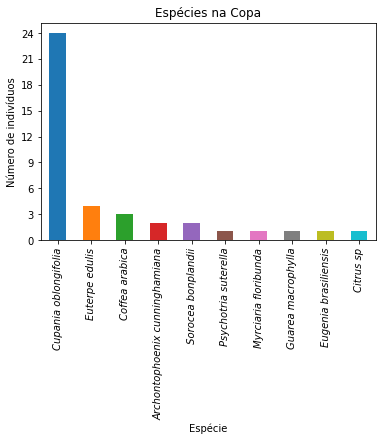

In [34]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_copa.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies na Copa")
plt.ylabel("Número de indivíduos")

Text(0,0.5,'Número de indivíduos')

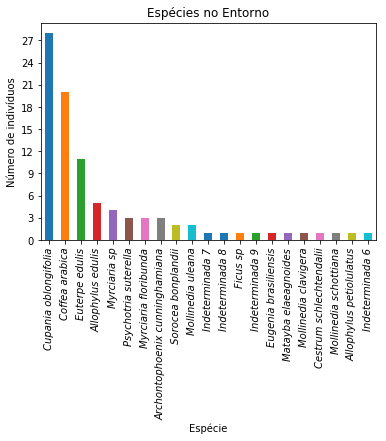

In [35]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df_without_nan[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

ax = plt.figure().gca()
ax = plot_entorno.plot.bar()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(fontstyle='italic')
plt.title ("Espécies no Entorno")
plt.ylabel("Número de indivíduos")

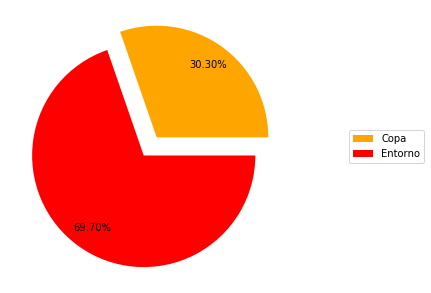

In [36]:
#Percentual de indivíduos arbóreos regenerantes sob a copa de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.

regenerantes_por_area = df_without_nan[~df_without_nan['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area > 0]
regenerantes_por_area = regenerantes_por_area.dropna()

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


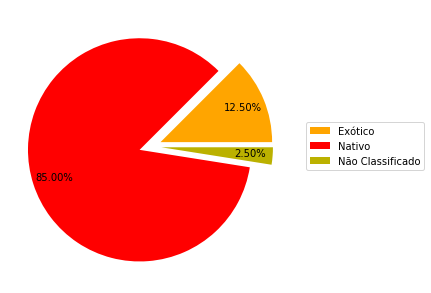

In [37]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


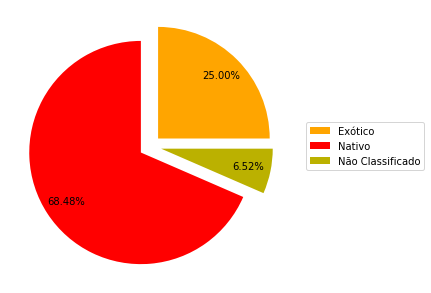

In [38]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos no entorno palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()

labels = ['Exótico', 'Nativo', 'Não Classificado']

sizes =  regenerantes_por_origem['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


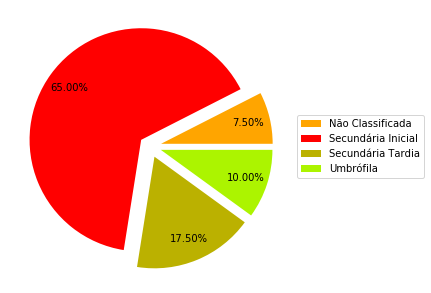

In [39]:
 #Proporção de indivíduos arbóreos regenerantes na COPA por ESTAGIO SUCESSIONAL
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()
labels
explode = [0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100',  '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [40]:
labels

['Não Classificada', 'Secundária Inicial', 'Secundária Tardia', 'Umbrófila']

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


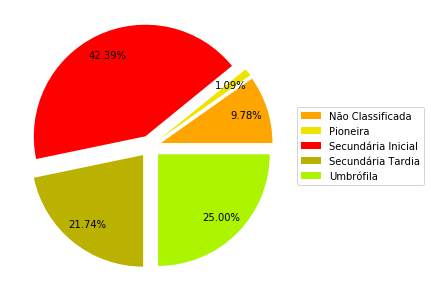

In [41]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros no entorno de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df_without_nan[df_without_nan['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#EFE400', '#FF0000',  '#BBB100', '#ACF400']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [42]:
labels

['Não Classificada',
 'Pioneira',
 'Secundária Inicial',
 'Secundária Tardia',
 'Umbrófila']

In [43]:
#Distribuição das espécies  regenerantes

#especies copa
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

#especies entorno
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

#especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]

#especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [44]:
#apenas copa

only_copa

3      Guarea macrophylla
135             Citrus sp
Name: Espécie, dtype: object

In [45]:
#apenas entorno
only_entorno

6              Indeterminada 6
9            Mollinedia uleana
10           Allophylus edulis
14             Indeterminada 8
15                    Ficus sp
54                Myrciaria sp
75        Matayba elaeagnoides
105       Mollinedia clavigera
109            Indeterminada 9
119      Mollinedia schottiana
122            Indeterminada 7
124    Allophylus petiolulatus
125    Cestrum schlechtendalii
Name: Espécie, dtype: object

In [46]:
#especies em comum
comum_copa_entorno

0               Cupania oblongifolia
24                    Coffea arabica
25                    Euterpe edulis
29    Archontophoenix cunninghamiana
33              Psychotria suterella
60                Sorocea bonplandii
61              Myrciaria floribunda
65              Eugenia brasiliensis
Name: Espécie, dtype: object

In [47]:
#merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,2
0,Entorno,13
0,Ambos,8


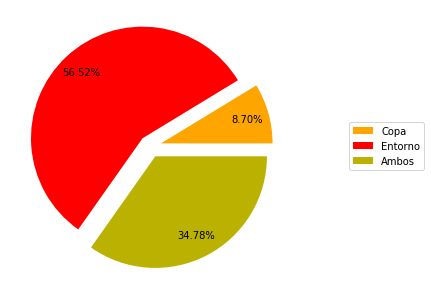

In [48]:
#grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [49]:
#Proporcao de individuos regenerantes na copa e no entorno 

#copa
copa_total = df_without_nan[df_without_nan['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

#entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)

resultado_merge


,Área,Quantidade
0,Copa,40
0,Entorno,92


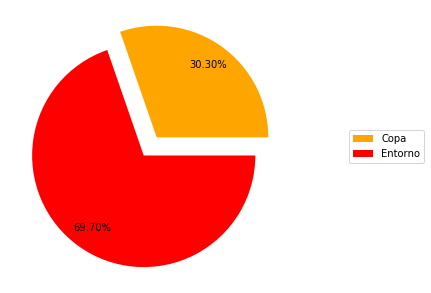

In [50]:
#Grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [51]:
#especies copa por estagio sucessional
all_copa = df_without_nan[df_without_nan['Área'] == 'Copa']
all_copa_secundaria_inicial =  all_copa[all_copa['Estágio sucessional'] == 'Secundária Inicial']
all_copa_secundaria_tardia =  all_copa[all_copa['Estágio sucessional'] == 'Secundária Tardia']
all_copa_pioneira =  all_copa[all_copa['Estágio sucessional'] == 'Pioneira']
all_copa_umbrofila=  all_copa[all_copa['Estágio sucessional'] == 'Umbrófila']

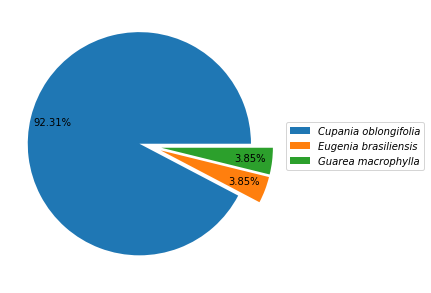

In [52]:
#Proporcao de especies por estagio secundaria incial nas copas
all_copa_secundaria_inicial = all_copa_secundaria_inicial.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_copa_secundaria_inicial['Espécie'].tolist()
sizes =  all_copa_secundaria_inicial['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1, 0.1, 0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

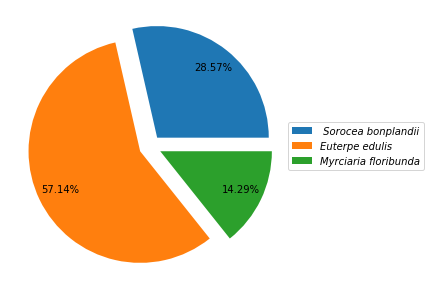

In [53]:
#Proporcao de especies por estagio secundaria tardio nas copas
all_copa_secundaria_tardia = all_copa_secundaria_tardia.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_copa_secundaria_tardia['Espécie'].tolist()
sizes =  all_copa_secundaria_tardia['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1, 0.1, 0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

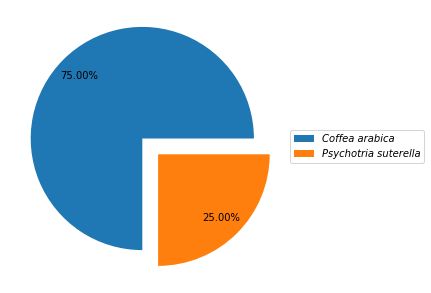

In [54]:
#Proporcao de especies por estagio  umbrofilo nas copas
all_copa_umbrofila = all_copa_umbrofila.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_copa_umbrofila['Espécie'].tolist()
sizes =  all_copa_umbrofila['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1, 0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

In [55]:
#especies entorno por estagio sucessional
all_entorno = df_without_nan[df_without_nan['Área'] == 'Entorno']
all_entorno_secundaria_inicial =  all_entorno[all_entorno['Estágio sucessional'] == 'Secundária Inicial']
all_entorno_secundaria_tardia =  all_entorno[all_entorno['Estágio sucessional'] == 'Secundária Tardia']
all_entorno_pioneira =  all_entorno[all_entorno['Estágio sucessional'] == 'Pioneira']
all_entorno_umbrofila=  all_entorno[all_entorno['Estágio sucessional'] == 'Umbrófila']

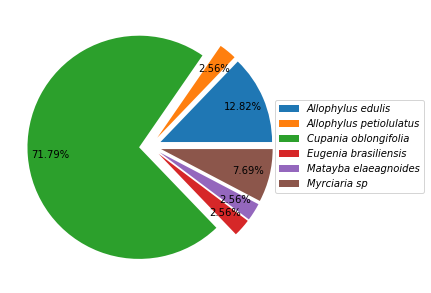

In [56]:
#Proporcao de especies por estagio secundaria incial no entorno
all_entorno_secundaria_inicial = all_entorno_secundaria_inicial.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_entorno_secundaria_inicial['Espécie'].tolist()
sizes =  all_entorno_secundaria_inicial['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
ax.axis('equal')
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))
plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

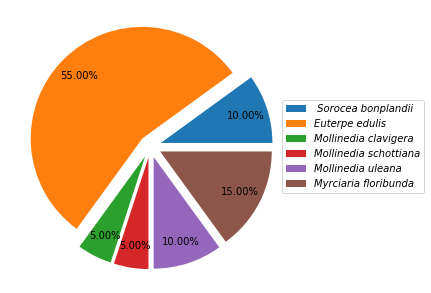

In [57]:
#Proporcao de especies por estagio secundaria tardia no entorno
all_entorno_secundaria_tardia = all_entorno_secundaria_tardia.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_entorno_secundaria_tardia['Espécie'].tolist()
sizes =  all_entorno_secundaria_tardia['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

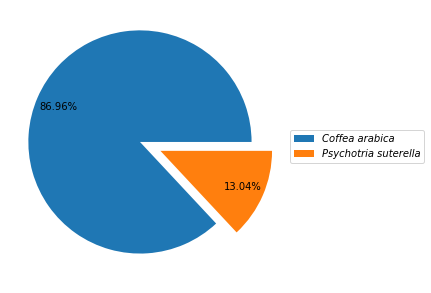

In [58]:
#Proporcao de especies por estagio umbrofilo no entorno
all_entorno_umbrofila = all_entorno_umbrofila.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_entorno_umbrofila['Espécie'].tolist()
sizes =  all_entorno_umbrofila['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1, 0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()

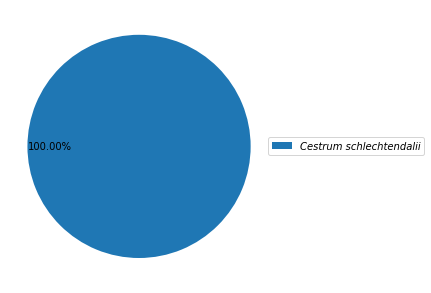

In [59]:
#Proporcao de especies por estagio  pioneiro no entorno
all_entorno_pioneira= all_entorno_pioneira.groupby('Espécie', as_index=False)['Número'].count() 
labels = all_entorno_pioneira['Espécie'].tolist()
sizes =  all_entorno_pioneira['Número'].tolist()
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')
explode = [0.1]
pie = ax.pie(sizes, explode,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right",  prop={ 'style': 'italic'} )
plt.show()